# ZAJEBISTY TYTUŁ SPRAWKA

## Opis problemu

## Przygotowanie środowiska

In [23]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Wczytanie danych

In [24]:
df = pd.read_csv("student-mat.csv")

Brakująca liczba danych: 0



## Podstawowe parametry danych

In [25]:
l_obiektow = df.shape[0]
l_atrybutow = df.columns.size

print("Liczba obiektów: {}".format(l_obiektow))
print("Liczba atrybutów: {}\n".format(l_atrybutow))

Liczba obiektów: 395
Liczba atrybutów: 33



## Przygotowanie danych

In [35]:
l_brakow = df.isnull().sum().sum()

print("Brakująca liczba danych: {}\n".format(l_brakow))

Brakująca liczba danych: 0



Jak widać powyżej nie brakuje żadnych danych, więc dane są gotowe do analizy.

## Zakres zmienności poszczególnych danych

In [26]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

Niektóre atrybuty są typu obiekt, więc nie są uwzględnione powyżej. Atrybuty typu obiekt możemy zastąpić wartościami liczbowymi.

## Przygotowanie danych do analizy atrybutów i zbadania korelacji

In [28]:
df = pd.read_csv("student-mat.csv")

school = {"GP": 0, "MS": 1}
df.school = df.school.map(school)

sex = {"F": 0, "M": 1}
df.sex = df.sex.map(sex)

address = {"R": 0, "U": 1}
df.address = df.address.map(address)

famsize = {"LE3": 0, "GT3": 1}
df.famsize = df.famsize.map(famsize)

Pstatus = {"A": 0, "T": 1}
df.Pstatus = df.Pstatus.map(Pstatus)

Mjob = {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}
df.Mjob = df.Mjob.map(Mjob)

Fjob = {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}
df.Fjob = df.Fjob.map(Fjob)

guardian = {'mother': 0, 'father': 1, 'other': 2}
df.guardian = df.guardian.map(guardian)

schoolsup = {"no": 0, "yes": 1}
df.schoolsup = df.schoolsup.map(schoolsup)

famsup = {"no": 0, "yes": 1}
df.famsup = df.famsup.map(famsup)

paid = {"no": 0, "yes": 1}
df.paid = df.paid.map(paid)

activities = {"no": 0, "yes": 1}
df.activities = df.activities.map(activities)

nursery = {"no": 0, "yes": 1}
df.nursery = df.nursery.map(nursery)

higher = {"no": 0, "yes": 1}
df.higher = df.higher.map(higher)

internet = {"no": 0, "yes": 1}
df.internet = df.internet.map(internet)

romantic = {"no": 0, "yes": 1}
df.romantic = df.romantic.map(romantic)

## Zakres zmienności z wykorzystaniem wszystkich atrybutów

In [29]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.711392,0.896203,2.749367,2.521519,2.483544,2.956962,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.421948,1.294530,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,4.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [30]:
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,1,0,4,4,3,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,1,1,1,1,3,4,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,0,1,1,1,3,4,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,1,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,1,1,3,3,4,4,...,4,3,2,1,2,5,4,6,10,10


## Wnioski z analizy atrybutów

## Analiza korelacji

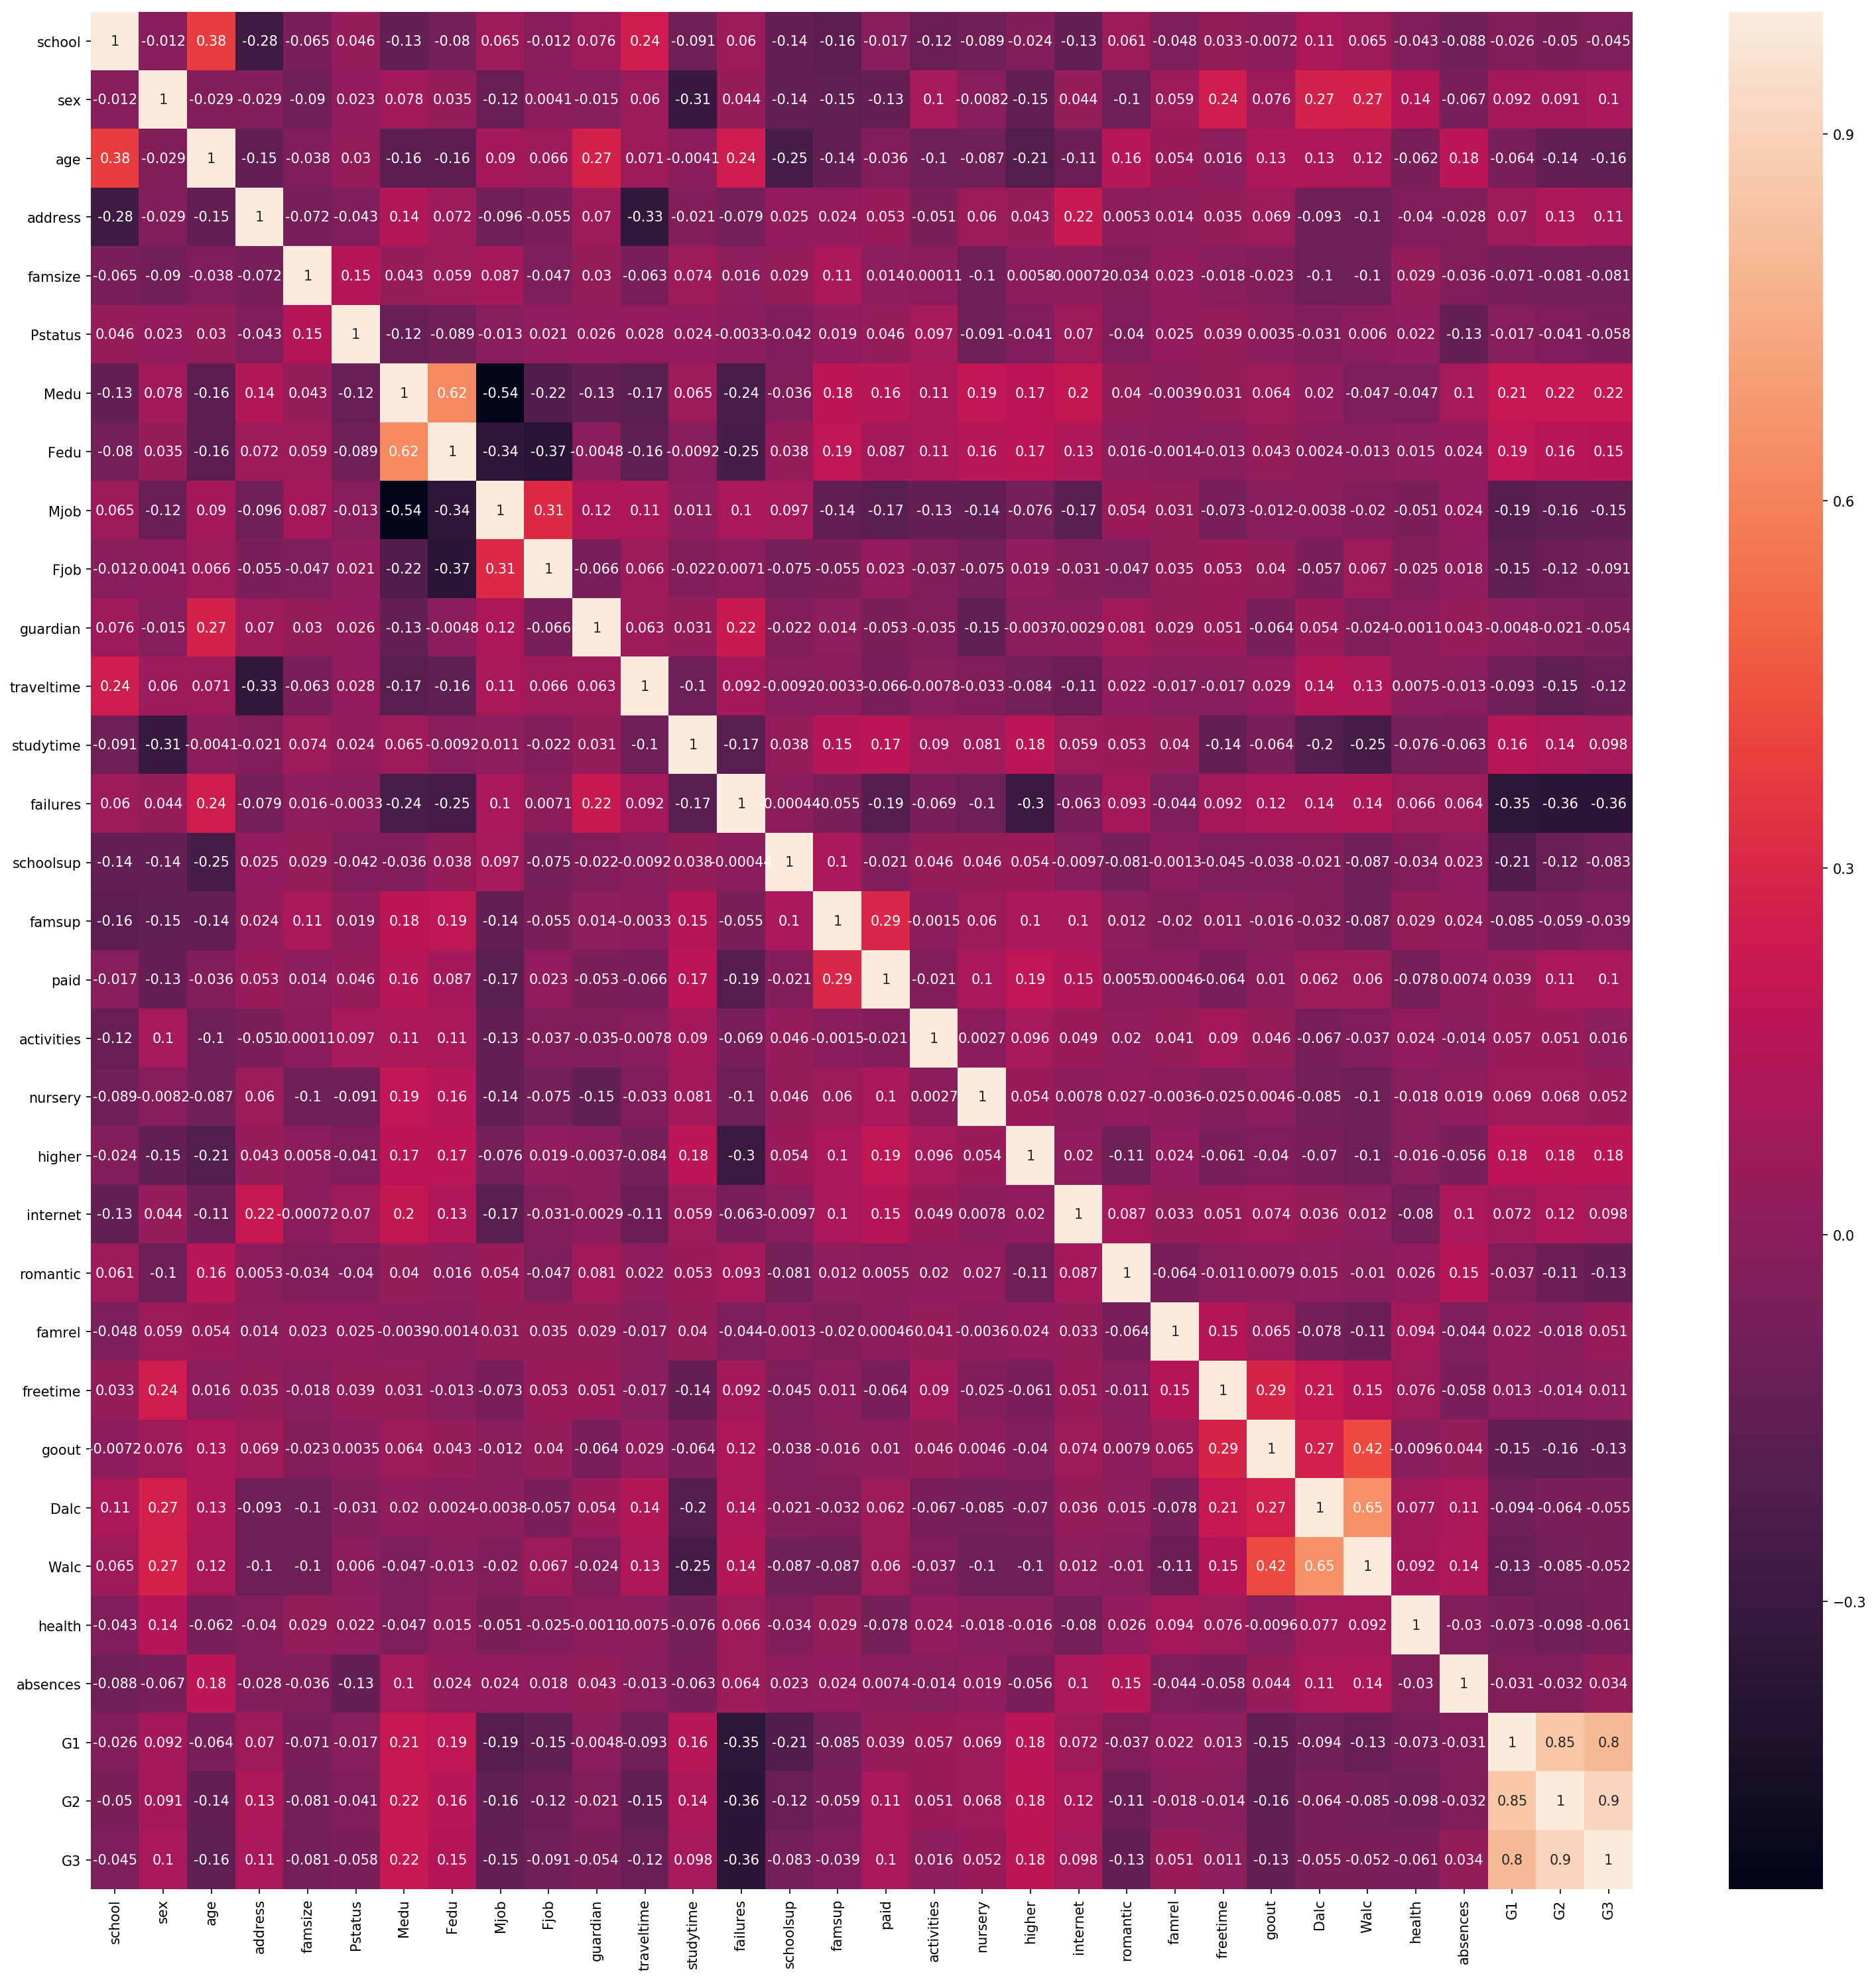

In [31]:
plt.figure(figsize=(25, 25), dpi = 150)
sns.heatmap(df.corr(), annot = df.corr())

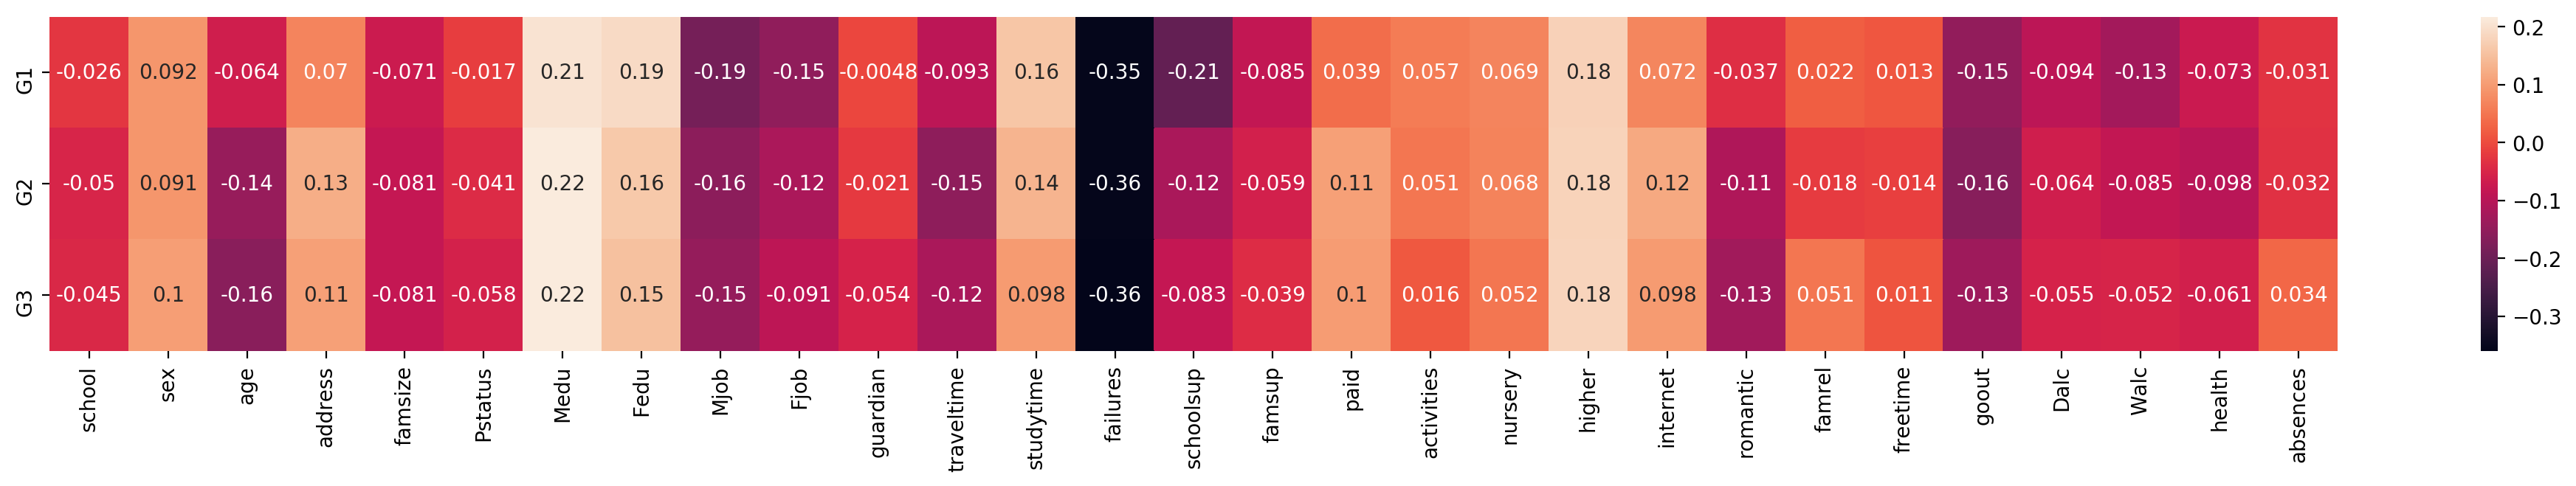

In [32]:
kolrelacjeOcen = df.corr().iloc[-3:, :-3]

plt.figure(figsize=(25, 3), dpi = 200)
sns.heatmap(kolrelacjeOcen, annot = kolrelacjeOcen)

In [33]:
corelacjeAtrybutow = kolrelacjeOcen.mean()

posortowaneAtrybuty = corelacjeAtrybutow.abs().sort_values(ascending=False)
posortowaneAtrybuty = pd.DataFrame(posortowaneAtrybuty, columns=["Korelacja z ocenami"])
posortowaneAtrybuty.index.name = "Atrybut"

posortowaneAtrybuty

,Korelacja z ocenami
Atrybut,
failures,0.357009
Medu,0.212672
higher,0.179953
Fedu,0.169207
Mjob,0.163055
goout,0.148048
schoolsup,0.137593
studytime,0.131437
age,0.123045


## Wnioski z analizy korelacji atrybutów

1. Największy wpływ na aktualną ocenę ucznia mają oceny z poprzednich lat. Jeśli uczeń uczył się dobrze, to prawdopodobnie w przyszłości też się będzie dobrze uczył.
2. Ogromny wpływa na ocenę ma również ilość niezaliczonych lat szkoły. Im więcej tym gorsze oceny dostaje uczeń i tym mniejsza chęć zdobycia wyższego wykształcenia. 
3. Ciekawą korelacją jest wykształcenie rodzicow. Małżonkowie zazwyczaj mają podobne wykształcenie.
4. Wykształcenie matki jest 3 najważniejszym czynnikiem wpływajacym na oceny ucznia.
5. Wykształcenie ojca jest bardzo istotne, ale nie tak istotne jak chęć podjęcia dalszej eduakcji. Chęć podjęcia dalszej edukacji jest ważniejsza niż czas spędzony na nauce. Liczą się chęci.
6. Płeć ma bardzo duży wpływ na czas wolny i czas nauki. Kobiety spędzają więcej czasu na nauce, a mężczyźni mają więcej czasu wolnego. Przełożenie na wyniki w nauce jest nieznaczne.
7. Mężczyźni piją zdecydowanie więcej alkoholu w weekendy i w tygodniu. Spożycie alkoholu jest mocno skorelowane z wychodzeniem z domu, ale to wychodzenie z domu ma dużo silniejszą korelację ze słabszymi wynikami w nauce. 
8. Weekendowe spożycie alkoholu jest silnie skorelowane z czasem poświęcanym na naukę. 
9. Mało ważne jest to kto jest odpowiedzialny ze ucznia, jeżeli chodzi o przyszłe oceny. Widać jednak, że wiek ma znaczenie na to kto opiekuje się uczniem. Wraz ze wzrostem wieku opiekę przestają sprawować rodzice.
10. Osoba odpowiedzialna ma wpływ na ilość niezaliczonych lat. W większości przypadków odpowiedzialna jest matka lub ktoś inny. Osoba nie ma zbyt dużo wpływu na ocenę w przyszłych latach, ale ilość niezaliczonych lat już tak.
   

## Parametry znaczące

## Korelacja pomiędzy atrybutami znaczącymi

## Grupowanie nie mam pomysłu na tytuł XD

## Wybór optymalnego klasyfikatora

## Ocena klasyfikacji

## Wnioski